# Cost Functions with Linear Regression

### Introduction

In the last lesson, we learned about our machine learning model of a regression line.  We saw how we can represent regression lines both in code and with a mathematical formula.  With simple linear regression, we know that our model takes the format of $/hat{y} = mx + b$ where $/hat{y}$ is the y value estimated by our line, $m$ is the slope of the line and $b$ is the $y$ intercept. 

We can use this formula to produce a line, and estimate an output for each provided input value, $x$.  In this lesson, we'll learn how to evaluate our line, with a cost function.

## Reviewing how to generate regression 

To evaluate the performance of our model, we first need to load our data, and build a model to see how well the model approximates our exists data.  

1. Load the data 

We load the data from the `months-since-revenues.json` and save the data to the variable `monthly revenues`.

In [2]:
import json
with open('months-since-revenues.json', 'r') as revenue_file:
    monthly_revenues = json.load(revenue_file)

2. Inspect the data

Then we reacclimate ourselves with the data that we loaded by looking at the first few entries.

In [3]:
monthly_revenues[0:3]

[{'revenue': 66609, 'month': '2015-09-30T00:00:00.000', 'month_number': 0},
 {'revenue': 67048, 'month': '2015-10-31T00:00:00.000', 'month_number': 1},
 {'revenue': 69664, 'month': '2015-11-30T00:00:00.000', 'month_number': 2}]

3. Plot the data

Ok, so the data looks to be sorted, and have attributes of `revenue`, `month`, and `month_number`.  We prefer to work with the `month_number` rather than directly with the date.  So in plotting our points, `month_number` will be our x coordinate and `revenue` will be our y coordinate.  Let's create lists of these two attributes (always checking our work along the way). 

In [5]:
revenues = list(map(lambda monthly_revenue: monthly_revenue['revenue'], monthly_revenues))
revenues[0:3]

[66609, 67048, 69664]

In [7]:
month_numbers = list(map(lambda monthly_revenue: monthly_revenue['month_number'], monthly_revenues))
month_numbers[0:3]

[0, 1, 2]

We set our two lists as respective values of our `x` and `y` keys in our trace below.

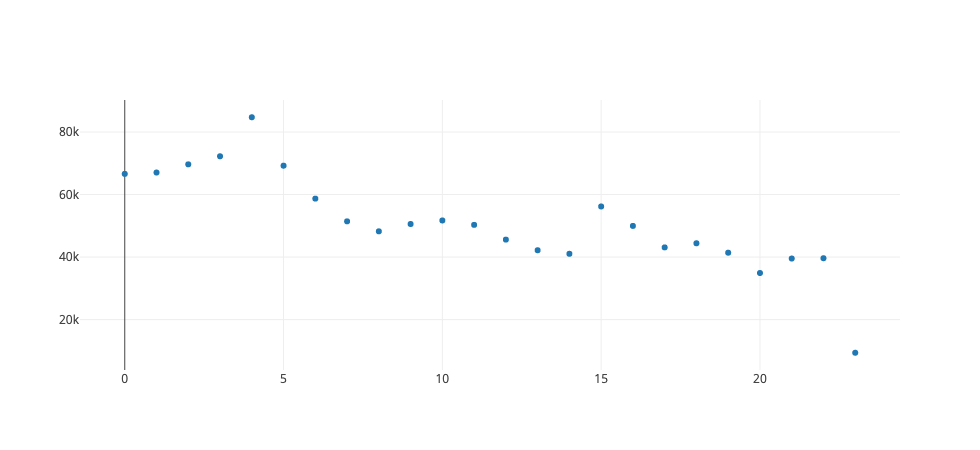

In [10]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

actual_trace = {'x': month_numbers, 'y': revenues, 'mode': 'markers', 'name': 'actual'}
iplot([actual_trace])

4. Create and plot our simple linear regression model

Our simple linear regression model is simply a formula in the format $\hat{y} = mx + b $, where what varies is our values of $m$ and $b$.  We'll set $m = -1500$ and $b = 60000$ for the formula $\hat{y} = -1500x + 6000 $.

Then we'll represent that formula as a function in Python.


In [22]:
def y_hat(x):
    m = -1500
    b = 65000
    return m*x + b 

This formula predicts an output for every input value of $x$ that we pass through.  So let's use this function to predict an output for each of the x values -- that is, our month numbers -- in our data.

In [23]:
y_hats = list(map(y_hat,month_numbers))
y_hats[0:3]

[65000, 63500, 62000]

Let's see if the numbers we generated make sense, given the input values of the month numbers we provided.

In [24]:
month_numbers[0:3]

[0, 1, 2]

Ok so when we pass the number 0 to our function, $m*x$ equals zero, then adding $b$ we get 6000, which is our first estimated value.  The other two numbers also look good.  Let's add our simple linear regression model to the earlier plot that we generated.  We'll again set `month_numbers` as our x coordinates, and this time our estimated `y_hats` as the y values. 

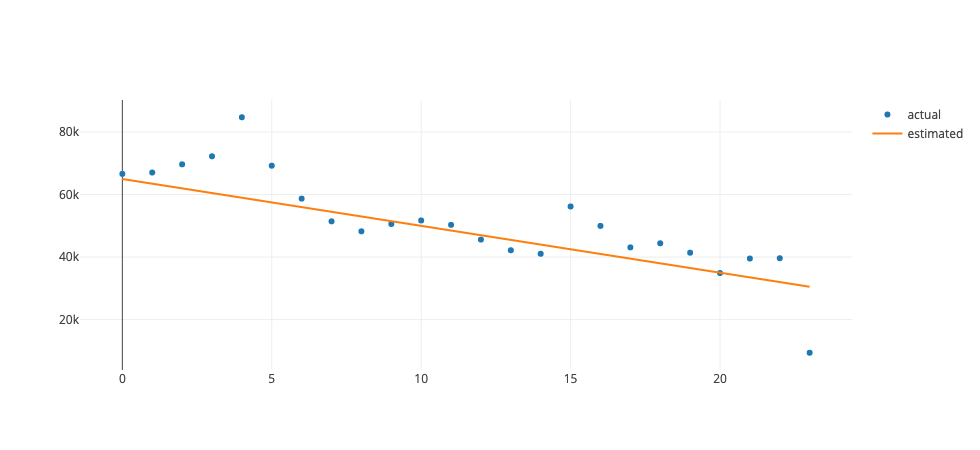

In [26]:
regression_model = {'x': month_numbers, 'y': y_hats, 'mode': 'lines', 'name': 'estimated'}
iplot([actual_trace, regression_model])

### Our cost function

Now that we have built this model, the next step is to evaluate how "good" this model is.  As always in machine learning, we do this with a cost function.  Let's start with a sum of errors cost function.

Our formula for error is the following:

> **error** = actual - expected.

And we can rewrite this as 

So looking at our first datapoint of (0, 66,609), to representing $66,609 earned in the first month, September 2015.  And remember that we already have a list of actual values.  

In [35]:
revenues[0:3] # [66609, 67048, 69664]
revenues[0]

66609

And we also have a list of expected values.

In [37]:
y_hats[0:3] # [65000, 63500, 62000]

[65000, 63500, 62000]

Our error is simply the following.

In [45]:
error_at_first_point = revenues[0] - y_hats[0]
error_at_first_point

1609

Now we want to calculate the error at each data point.  Note that the only part of the code above that will change is the index, 0.  So let's use a `for` loop and simply change the index at each iteration.  We can push in each of our error values as we go. 

In [95]:
errors = []
for idx in range(0, len(monthly_revenues)):
    errors.append(revenues[idx] - y_hats[idx])

In [96]:
errors[0:3]

[1609, 3548, 7664]

Ok now that we have our list of errors we can just add them up with the sum function.

In [48]:
total_error = sum(errors)
total_error

81793

### Improving our cost function

Let's display our graph with the errors.

In [77]:
error_traces = error_line_traces(month_numbers, revenues, errors)

NameError: name 'months_and_errors' is not defined

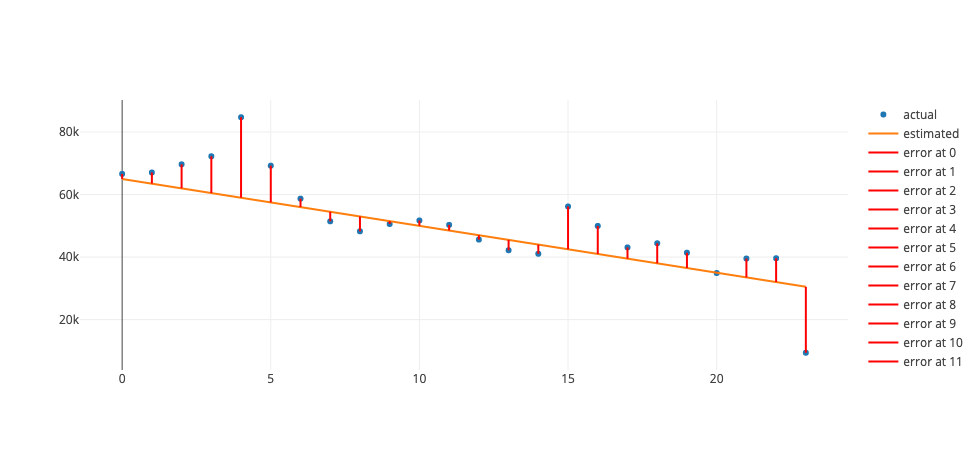

In [69]:
regression_model = {'x': month_numbers, 'y': y_hats, 'mode': 'lines', 'name': 'estimated'}
iplot([actual_trace, regression_model ] + error_traces)

Now take a look at the graph above.  Let's take a look at the error at our fifth datapoint, where $x = 4$, and at our last datapoint where $x = 23$.  These are our errors at those two points.

In [84]:
errors[4] # 25721
errors[-1] # -21100

-21100

Notice that when $x = 4$ our error is positive as subtracting `actual - expected` gives us a positive number where our model underestimates the revenue.  However at the final x value, our model overestimates the actual value, and therefore actual - expected = 9400 - 30500, which is negative.

Ultimately the cost function we used was sum of the errors.  So when we add these two errors together: $-21100 + 25721 = 4621$, they begin to cancel each other out.  In other words, our positive errors are offsetting our our negative errors, and so when we add up all of these errors, our total will be smaller then we like.

This is bad because imagine if we had a model that able to curve closer to that underestimated value at $x = 4$, and that underestimated value at our last point, we would want that to be reflected with a relatively lower cost function.  So we need to prevent our positive and negative errors from offsetting one another.

### The fix: RSS

We can fix solve this problem simply by making each error positive.  After all, with our cost function, we don't really care if our error is positive or negative, we simply want our cost function to increase whenever we miss the actual value. 

We solve this by squaring each of the errors.  This works because when we square an a number the result is always positive.

In [85]:
3**2

9

In [87]:
(-3)**2

9

So now we don't need to create a list of errors, and add them up, but to create a list of squared errors and add them up.  This is easy enough.

We start with our errors.

In [97]:
errors[0:3]

[1609, 3548, 7664]

And square each of them.

In [98]:
squared_errors = list(map(lambda error: (error)**2 ,errors))

Let's see if this worked.  We can check on the squared error for our last point, which used to be negative.

In [100]:
squared_errors[-1]

445210000

In [101]:
errors[-1]

-21100

Cool, that looks better, and also looks like the square.  This is called the Residual Sum of Squares, and is the cost function data scientists the world over use for linear regression.  Let's see this expressed mathematically: 

$RSS = (actual_1 - expected_1)^2 + (actual_2 - expected_2)^2 + ...$

Above just means what we illustrated before.  Calculate the error for the first point and square, then calculate the error for the second point and square it, and so on.  That little 1 at the bottom just means the first datapoint.  You can think of it as the index, but notice that in math we start our index with the number 1 instead of 0.

And of course, we can rewrite this formula using the $y$ to represent our actual value and $\hat{y}$ to represent our expected value, giving us:

$RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + ...$

### Summary